# WeCare

#### Load the libraries

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#### load the customer transaction spend data file

In [2]:
try:
    data = pd.read_csv("D://Python//input//custspend.csv")
    master_data = pd.read_csv("D://Python//input//custspend.csv")
    data.drop(['custid', 'region'], axis = 1, inplace = True)
    print("loaded ok")
except:
    print("loading failed")

loaded ok


In [3]:
display(data.describe())

,cash,Medical,highvalue,eatout,travel,grocery
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
# Create a sample set of customers who we want to identify which segment they belong to be provided to the MyBanker BOT
# Select three indices to sample from the dataset
indices = [86,182,336]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Selected the sample customers:")
display(samples)

Selected the sample customers:


,cash,Medical,highvalue,eatout,travel,grocery
0,22925,73498,32114,987,20070,903
1,694,8533,10518,443,6907,156
2,13970,1511,1330,650,146,778


## In order to identify relationship between categories, we will try to remove one feature randomly and see if the other data can predict the missing category

In [5]:
new_data = data.drop('highvalue', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data.highvalue, test_size=0.25, random_state=42)
# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
# Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
print("Prediction score is: {}".format(score))

Prediction score is: 0.6929984474582753


In [6]:
new_sample = samples.drop('highvalue', axis=1)

### we got a prediction score of 67% which is decent good so this feature is easy to predict using other spending pattern of the customer

#### EDA

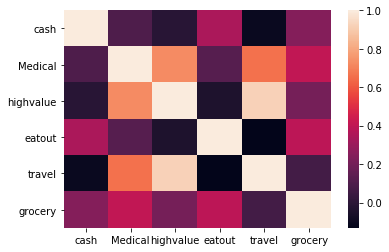

In [7]:
sns.heatmap(data.corr());

#### Assessment : As we can see that travel and highvalue are correlated which made sense and can see it in the data. Hence we can drop one of the feature and still good with our predictions

###  Pre-Processing of data and Cleanup

In [8]:
log_data = np.log(new_data)  #scale the data to normalize the data
log_samples = np.log(new_sample) #scale samples also for ease of prediction seperately into the weCare bot

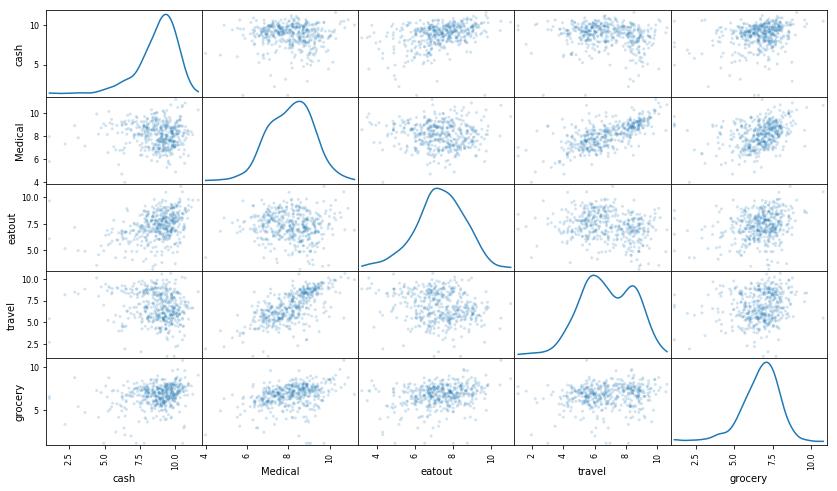

In [9]:
pd.plotting.scatter_matrix(log_data, alpha = 0.2, figsize = (14,8), diagonal = 'kde');

In [10]:
#outlier detection and removal
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
   # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    lista = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature 'cash':


,cash,Medical,eatout,travel,grocery
65,4.442651,9.950323,3.583519,10.095388,7.260523
66,2.197225,7.335634,5.164786,8.151333,3.295837
81,5.389072,9.163249,5.645447,8.964184,5.049856
95,1.098612,7.979339,6.086775,5.407172,6.563856
96,3.135494,7.869402,4.976734,8.262043,5.379897
128,4.941642,9.087834,4.955827,6.967909,1.098612
171,5.298317,10.160530,6.478510,9.079434,8.740337
193,5.192957,8.156223,6.865891,8.633731,6.501290
218,2.890372,8.923191,7.158514,8.475746,8.759669
304,5.081404,8.917311,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Medical':


,cash,Medical,eatout,travel,grocery
86,10.039983,11.205013,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.317488,1.945910,2.079442
356,10.029503,4.897840,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'eatout':


,cash,Medical,eatout,travel,grocery
38,8.431853,9.663261,3.496508,8.847360,6.070738
57,8.597297,9.203618,3.637586,8.932213,7.156177
65,4.442651,9.950323,3.583519,10.095388,7.260523
145,10.000569,9.034080,3.737670,9.440738,8.396155
175,7.759187,8.967632,3.951244,8.341887,7.436617
264,6.978214,9.177714,4.110874,8.696176,7.142827
325,10.395650,9.728181,11.016479,7.148346,8.632128
420,8.402007,8.569026,3.218876,8.827321,7.239215
429,9.060331,7.467371,3.850148,4.430817,7.824446
439,7.932721,7.437206,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'travel':


,cash,Medical,eatout,travel,grocery
75,9.923192,7.036148,8.390949,1.098612,6.882437
161,9.428190,6.291569,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'grocery':


,cash,Medical,eatout,travel,grocery
66,2.197225,7.335634,5.164786,8.151333,3.295837
109,7.248504,9.724899,6.511745,6.728629,1.098612
128,4.941642,9.087834,4.955827,6.967909,1.098612
137,8.034955,8.997147,6.493754,6.580639,3.583519
142,10.519646,8.875147,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.317488,1.945910,2.079442
183,10.514529,10.690808,10.505999,5.476464,10.777768
184,5.789960,6.822197,4.304065,5.811141,2.397895
187,7.798933,8.987447,8.743372,8.148735,1.098612
203,6.368187,6.529419,6.150603,6.860664,2.890372


In [11]:
# Detecting outliers that appear in more than one product
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
dupes

[65, 66, 128, 154]

In [12]:
# Removing outliers  
good_data = log_data.drop(dupes, axis=0).reset_index(drop=True)

### Feature Transformation : PCA

In [13]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=good_data.shape[1])
pca = pca.fit(good_data)

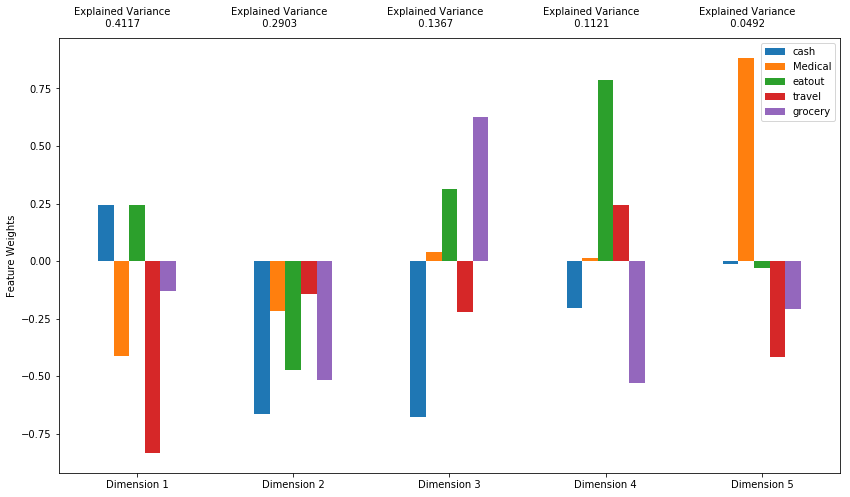

In [14]:
#vizulaize the PCA results
dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions
fig, ax = plt.subplots(figsize = (14,8))
components.plot(ax = ax, kind = 'bar');
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dimensions, rotation=0)
for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))
# Return a concatenated DataFrame
    pd.concat([variance_ratios, components], axis = 1)

#### Observation : The first two dimensions can explain 70% of the variance in data

In [15]:
pca = PCA(n_components=2).fit(good_data) #select two dimensions
reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_samples)  #transform the sample selected customer data using the PCA fit from above
#reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2','Dimension 3','Dimension 4'])
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1','Dimension 2'])

### Clustering  -  GMM 

In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
scores = {}
for i in range(2,7):
    clusterer = GaussianMixture(random_state=42, n_components=i)
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_
    print('Cluster Center: ' + str(centers))
    sample_preds = clusterer.predict(pca_samples) ## sample data prediction of cluster
    print('Sample predictions: ' + str(sample_preds))
    score = silhouette_score(reduced_data, preds)
    scores[i] = score
    print('Silhouette score is: ' + str(score), '\n')
print('Scores: ' + str(scores))

Cluster Center: [[ 1.15050483 -0.07575891]
 [-2.02619816  0.13342192]]
Sample predictions: [1 1 0]
Silhouette score is: 0.39865623025356783 

Cluster Center: [[-1.93711454 -0.14691981]
 [-0.94260738  0.88857084]
 [ 1.22679816 -0.17896433]]
Sample predictions: [1 0 2]
Silhouette score is: 0.3800932248968539 

Cluster Center: [[-2.08503832 -0.24804609]
 [-0.23805079  2.22773221]
 [ 1.01209049  0.31018495]
 [ 1.23216508 -0.99576375]]
Sample predictions: [0 0 2]
Silhouette score is: 0.3044351179719589 

Cluster Center: [[ 1.04803704  0.24823677]
 [-2.75457143  1.27847853]
 [ 1.90247364  1.97196358]
 [ 1.24788458 -1.26024418]
 [-1.50588381 -0.69098188]]
Sample predictions: [4 1 0]
Silhouette score is: 0.3217539818831624 

Cluster Center: [[-0.01545982  0.56415397]
 [-2.74887545  1.32555416]
 [ 1.89949476  2.94347779]
 [ 1.30077995 -1.4015394 ]
 [-1.69479497 -0.79386939]
 [ 1.4687692   0.09522641]]
Sample predictions: [4 1 5]
Silhouette score is: 0.29897913842398444 

Scores: {2: 0.398656230

In [17]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(random_state=42, n_components=2)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_
print('Cluster Center: ' + str(centers))

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
scores[i] = score
print('Silhouette score is: ' + str(score), '\n')

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
print('Sample predictions: ' + str(sample_preds))

Cluster Center: [[ 1.15050483 -0.07575891]
 [-2.02619816  0.13342192]]
Silhouette score is: 0.39865623025356783 

Sample predictions: [1 1 0]


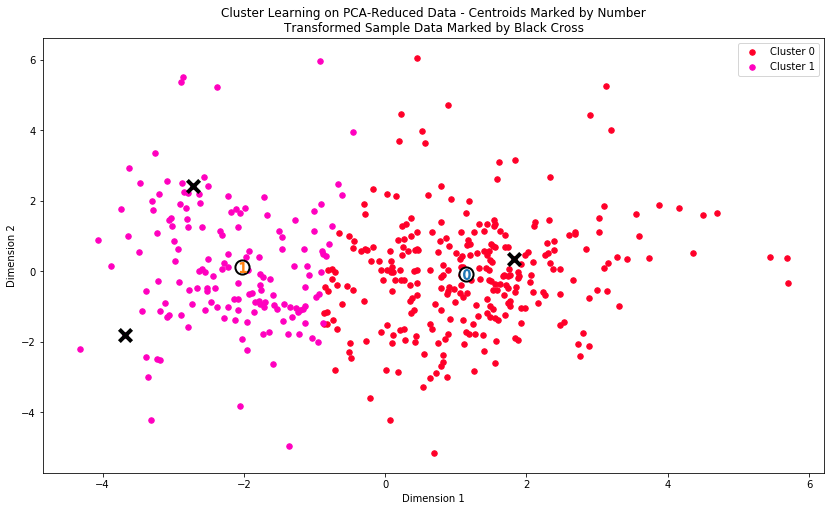

In [18]:
import matplotlib.cm as cm
### Visualize the clusters
predictions = pd.DataFrame(preds, columns = ['Cluster'])
plot_data = pd.concat([predictions, reduced_data], axis = 1)
fig, ax = plt.subplots(figsize = (14,8))
cmap = cm.get_cmap('gist_rainbow')
for i, cluster in plot_data.groupby('Cluster'):   
    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);
for i, c in enumerate(centers):
    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
               alpha = 1, linewidth = 2, marker = 'o', s=200);
    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);
    
# Plot transformed sample points     
ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
           s = 150, linewidth = 4, color = 'black', marker = 'x');
ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


In [19]:
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [20]:
# Merge with the original customer id data
cust_id = pd.DataFrame(master_data['custid'], columns = ['custid'])
cust_id = cust_id.drop(cust_id.index[dupes]).reset_index(drop = True)
labeled = pd.concat([cust_id,predictions], axis = 1)

In [21]:
out_data = labeled.iloc[indices]

In [22]:
out_data

,custid,Cluster
86,August,0
182,Vernon,0
336,Jess,1
